In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install mat4py

In [ ]:
pip install dtcwt

     |████████████████████████████████| 70 kB 3.8 MB/s 
  Created wheel for dtcwt: filename=dtcwt-0.12.0-py3-none-any.whl size=87885 sha256=12374abc951208b4984db3a75447118791d83c4675346b4a637f396ab4f6322a
  Stored in directory: /root/.cache/pip/wheels/36/17/44/41d78d570172185f944f9b79f983905ab9072d70dbdb118710
Successfully built dtcwt


In [ ]:
from mat4py import loadmat
# EEG data for 1st person's 1st experiment for 15 trials in one experiment
path=r'/content/drive/MyDrive/eeg/1_20131027.mat'
data = loadmat(path)

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.shape

(62, 15)

# Data Loading

EEG data for 1st person's 1st experiment for 15 trials in one experiment

In [ ]:
data.head()

,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[-11.622905731201172, -16.21246337890625, -17....","[-57.637691497802734, -41.15700721740723, -41....","[-51.25999450683594, -49.35264587402344, -48.8...","[-11.742115020751953, -14.185905456542969, -15...","[-14.513731002807617, -12.546777725219727, -15...","[-9.119510650634766, -0.8344650268554688, 3.81...","[-33.49781036376953, -37.96815872192383, -37.5...","[-13.560056686401367, -16.09325408935547, -11....","[-15.76542854309082, -17.195940017700195, -22....","[-25.36177635192871, -15.527009963989258, -9.8...","[-13.023614883422852, -13.381242752075195, -7....","[-72.24082946777344, -64.76044654846191, -63.9...","[24.259090423583984, 18.864870071411133, 16.98...","[27.14991569519043, 21.159648895263672, 18.835...","[-7.957220077514648, -9.08970832824707, -4.142..."
1,"[14.930963516235352, 8.07642936706543, 8.19563...","[-20.176172256469727, -6.347894668579102, -7.9...","[-37.670135498046875, -34.60049629211426, -34....","[-34.60049629211426, -43.72000694274902, -41.2...","[-29.712915420532227, -25.779008865356445, -34...","[14.603137969970703, 24.884939193725586, 28.66...","[-19.729137420654297, -24.586915969848633, -23...","[-16.480684280395508, -15.735626220703125, -14...","[-1.519918441772461, 1.0132789611816406, -1.63...","[-41.24641418457031, -36.09061241149902, -31.8...","[-45.32933235168457, -42.64712333679199, -40.8...","[-38.14697265625, -31.35204315185547, -32.3057...","[7.18235969543457, 3.6954879760742188, 1.49011...","[0.38743019104003906, -5.930662155151367, -4.8...","[-18.030405044555664, -18.328428268432617, -20..."
2,"[38.057565689086914, 25.570392608642578, 37.99...","[-14.096498489379883, 2.4139881134033203, -3.9...","[-100.76165199279785, -98.07944297790527, -99....","[-15.70582389831543, -19.073486328125, -10.222...","[4.76837158203125, -7.599592208862305, -5.3644...","[5.573034286499023, 18.11981201171875, 22.6199...","[-46.78964614868164, -49.054622650146484, -48....","[-31.650066375732422, -24.22928810119629, -20....","[-8.881092071533203, 2.2351741790771484, 1.311...","[-25.063753128051758, -19.01388168334961, -14....","[-18.984079360961914, -22.44114875793457, -25....","[-59.7834587097168, -59.992074966430664, -54.6...","[24.050474166870117, 26.106834411621094, 25.00...","[19.788742065429688, 9.5367431640625, 13.47064...","[4.500150680541992, 0.0, -5.4836273193359375, ..."
3,"[-11.801719665527344, -13.530254364013672, -12...","[-48.19035530090332, -34.66010093688965, -33.7...","[0.14901161193847656, -1.1920928955078125, 0.5...","[-10.848045349121094, -15.735626220703125, -15...","[-5.900859832763672, -2.2649765014648438, -5.8...","[-1.9073486328125, 4.649162292480469, 8.612871...","[-32.99117088317871, -37.670135498046875, -37....","[-30.100345611572266, -29.653310775756836, -26...","[-11.38448715209961, -12.248754501342773, -13....","[-27.71615982055664, -19.937753677368164, -19....","[-5.632638931274414, -7.748603820800781, -4.44...","[-37.69993782043457, -33.736228942871094, -35....","[19.63973045349121, 17.523765563964844, 16.540...","[15.944242477416992, 10.43081283569336, 8.6426...","[-7.361173629760742, -9.119510650634766, -6.16..."
4,"[13.977289199829102, 3.814697265625, -2.205371...","[-8.970499038696289, -1.996755599975586, -3.33...","[-16.182661056518555, -11.354684829711914, -11...","[-9.655952453613281, -10.669231414794922, -1.8...","[-6.079673767089844, -7.987022399902344, -10.5...","[-0.7748603820800781, 4.32133674621582, 8.2850...","[-26.464462280273438, -26.58367156982422, -31....","[-33.795833587646484, -26.613473892211914, -29...","[-15.169382095336914, -11.95073127746582, -11....","[-20.3549861907959, -16.480684280395508, -12.6...","[-9.953975677490234, -11.324882507324219, -20....","[-29.05726432800293, -23.90146255493164, -23.2...","[14.603137969970703, 11.175870895385742, 9.775...","[-7.927417755126953, -8.821487426757812, -10.9...",

In [ ]:
path=r'/content/drive/MyDrive/eeg/label.mat'
Trial_labels = pd.DataFrame(loadmat(path))

Trial_labels contains labels for each trial in a experiment

In [ ]:
Trial_labels.shape

(15, 1)

In [ ]:
Trial_labels.head()

,label
0,1
1,0
2,-1
3,-1
4,0


In [ ]:
Trial_labels['label'].value_counts()

-1    5
 1    5
 0    5
Name: label, dtype: int64

<BarContainer object of 3 artists>

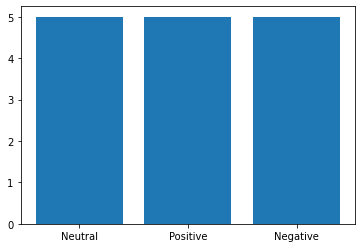

In [ ]:
plt.bar(['Neutral','Positive','Negative'],Trial_labels['label'].value_counts())

**Each emotion has 5 clips in one experiment**

# Dual Tree Complex Wavelet Transform

In [ ]:
from matplotlib.pylab import *
import dtcwt

DTCWT on EEG data on first trial of first channel

In [ ]:
np.array(data.loc[0,'djc_eeg1'])

array([-11.62290573, -16.21246338, -17.13633537, ..., -46.10419273,
       -51.05137825, -43.6604023 ])

In [ ]:
transform = dtcwt.Transform1d()
vecs_t = transform.forward(np.array(data.loc[0,'djc_eeg1'][:-1]), nlevels=5)

In [ ]:
vecs_recon = transform.inverse(vecs_t)

In [ ]:
vecs_recon

array([-11.62290573, -16.21246338, -17.13633537, ..., -44.91209984,
       -46.10419273, -51.05137825])

In [ ]:
mae=np.sum(np.abs(data.loc[0,'djc_eeg1'][:-1]-vecs_recon))/len(vecs_recon)
print('Reconstruction mae : ',mae)

Reconstruction mae :  6.7593683310126516e-15


Text(0.5, 1.0, 'Raw Signal')

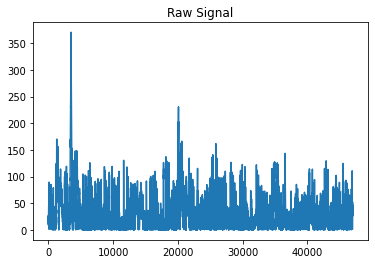

In [ ]:
figure()
plot(np.abs(data.loc[0,'djc_eeg1'][:-1]))
title('Raw Signal')

Text(0.5, 1.0, 'Level 1 wavelet coefficient magnitudes')

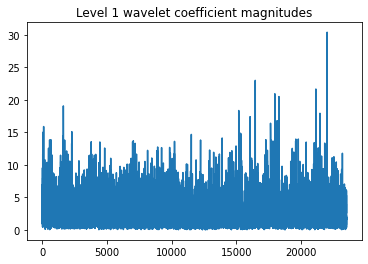

In [ ]:
figure()
plot(np.abs(vecs_t.highpasses[0]))
title('Level 1 wavelet coefficient magnitudes')

In [ ]:
len(vecs_t.highpasses[4])

1469

Text(0.5, 1.0, 'Level 2 wavelet coefficient magnitudes')

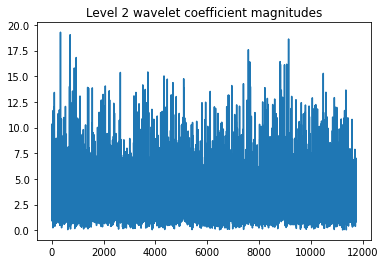

In [ ]:
figure()
plot(np.abs(vecs_t.highpasses[1]))
title('Level 2 wavelet coefficient magnitudes')

Text(0.5, 1.0, 'Level 3 wavelet coefficient magnitudes')

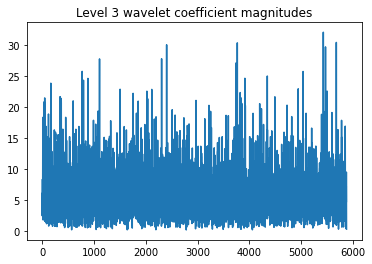

In [ ]:
figure()
plot(np.abs(vecs_t.highpasses[2]))
title('Level 3 wavelet coefficient magnitudes')

Text(0.5, 1.0, 'Level 4 wavelet coefficient magnitudes')

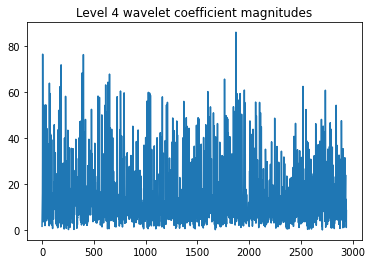

In [ ]:
figure()
plot(np.abs(vecs_t.highpasses[3]))
title('Level 4 wavelet coefficient magnitudes')

Text(0.5, 1.0, 'Level 5 wavelet coefficient magnitudes')

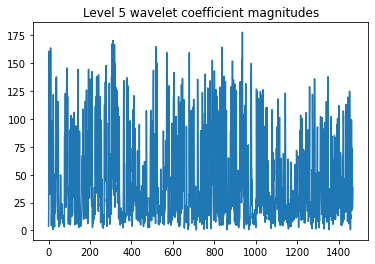

In [ ]:
figure()
plot(np.abs(vecs_t.highpasses[4]))
title('Level 5 wavelet coefficient magnitudes')

In [ ]:
data.columns

Index(['djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6',
       'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11',
       'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15'],
      dtype='object')

DTCWT on whole data of one person

In [ ]:
data_dtcwt=data.copy()
data_dtcwt_delta=data.copy()
data_dtcwt_theta=data.copy()
data_dtcwt_alpha=data.copy()
data_dtcwt_beta=data.copy()
data_dtcwt_gamma=data.copy()

In [ ]:
transform = dtcwt.Transform1d()
for row in range(data.shape[0]):
    for col in data.columns:
        #checking if size of eeg_data is even
        if(len(data.loc[row,col])%2!=0):
            eeg_data=np.array(data.loc[row,col][:-1])
        else:
            eeg_data=np.array(data.loc[row,col])
        vecs_t = transform.forward(eeg_data, nlevels=5)
        data_dtcwt_delta.loc[row,col]=vecs_t.highpasses[0]
        data_dtcwt_theta.loc[row,col]=vecs_t.highpasses[1]
        data_dtcwt_alpha.loc[row,col]=vecs_t.highpasses[2]
        data_dtcwt_beta.loc[row,col]=vecs_t.highpasses[3]
        data_dtcwt_gamma.loc[row,col]=vecs_t.highpasses[4]
        data_dtcwt.loc[row,col]= transform.inverse(vecs_t)   

In [ ]:
data.head()

,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[-11.622905731201172, -16.21246337890625, -17....","[-57.637691497802734, -41.15700721740723, -41....","[-51.25999450683594, -49.35264587402344, -48.8...","[-11.742115020751953, -14.185905456542969, -15...","[-14.513731002807617, -12.546777725219727, -15...","[-9.119510650634766, -0.8344650268554688, 3.81...","[-33.49781036376953, -37.96815872192383, -37.5...","[-13.560056686401367, -16.09325408935547, -11....","[-15.76542854309082, -17.195940017700195, -22....","[-25.36177635192871, -15.527009963989258, -9.8...","[-13.023614883422852, -13.381242752075195, -7....","[-72.24082946777344, -64.76044654846191, -63.9...","[24.259090423583984, 18.864870071411133, 16.98...","[27.14991569519043, 21.159648895263672, 18.835...","[-7.957220077514648, -9.08970832824707, -4.142..."
1,"[14.930963516235352, 8.07642936706543, 8.19563...","[-20.176172256469727, -6.347894668579102, -7.9...","[-37.670135498046875, -34.60049629211426, -34....","[-34.60049629211426, -43.72000694274902, -41.2...","[-29.712915420532227, -25.779008865356445, -34...","[14.603137969970703, 24.884939193725586, 28.66...","[-19.729137420654297, -24.586915969848633, -23...","[-16.480684280395508, -15.735626220703125, -14...","[-1.519918441772461, 1.0132789611816406, -1.63...","[-41.24641418457031, -36.09061241149902, -31.8...","[-45.32933235168457, -42.64712333679199, -40.8...","[-38.14697265625, -31.35204315185547, -32.3057...","[7.18235969543457, 3.6954879760742188, 1.49011...","[0.38743019104003906, -5.930662155151367, -4.8...","[-18.030405044555664, -18.328428268432617, -20..."
2,"[38.057565689086914, 25.570392608642578, 37.99...","[-14.096498489379883, 2.4139881134033203, -3.9...","[-100.76165199279785, -98.07944297790527, -99....","[-15.70582389831543, -19.073486328125, -10.222...","[4.76837158203125, -7.599592208862305, -5.3644...","[5.573034286499023, 18.11981201171875, 22.6199...","[-46.78964614868164, -49.054622650146484, -48....","[-31.650066375732422, -24.22928810119629, -20....","[-8.881092071533203, 2.2351741790771484, 1.311...","[-25.063753128051758, -19.01388168334961, -14....","[-18.984079360961914, -22.44114875793457, -25....","[-59.7834587097168, -59.992074966430664, -54.6...","[24.050474166870117, 26.106834411621094, 25.00...","[19.788742065429688, 9.5367431640625, 13.47064...","[4.500150680541992, 0.0, -5.4836273193359375, ..."
3,"[-11.801719665527344, -13.530254364013672, -12...","[-48.19035530090332, -34.66010093688965, -33.7...","[0.14901161193847656, -1.1920928955078125, 0.5...","[-10.848045349121094, -15.735626220703125, -15...","[-5.900859832763672, -2.2649765014648438, -5.8...","[-1.9073486328125, 4.649162292480469, 8.612871...","[-32.99117088317871, -37.670135498046875, -37....","[-30.100345611572266, -29.653310775756836, -26...","[-11.38448715209961, -12.248754501342773, -13....","[-27.71615982055664, -19.937753677368164, -19....","[-5.632638931274414, -7.748603820800781, -4.44...","[-37.69993782043457, -33.736228942871094, -35....","[19.63973045349121, 17.523765563964844, 16.540...","[15.944242477416992, 10.43081283569336, 8.6426...","[-7.361173629760742, -9.119510650634766, -6.16..."
4,"[13.977289199829102, 3.814697265625, -2.205371...","[-8.970499038696289, -1.996755599975586, -3.33...","[-16.182661056518555, -11.354684829711914, -11...","[-9.655952453613281, -10.669231414794922, -1.8...","[-6.079673767089844, -7.987022399902344, -10.5...","[-0.7748603820800781, 4.32133674621582, 8.2850...","[-26.464462280273438, -26.58367156982422, -31....","[-33.795833587646484, -26.613473892211914, -29...","[-15.169382095336914, -11.95073127746582, -11....","[-20.3549861907959, -16.480684280395508, -12.6...","[-9.953975677490234, -11.324882507324219, -20....","[-29.05726432800293, -23.90146255493164, -23.2...","[14.603137969970703, 11.175870895385742, 9.775...","[-7.927417755126953, -8.821487426757812, -10.9...",

In [ ]:
data_dtcwt.head()

,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[-11.622905731201163, -16.212463378906243, -17...","[-57.637691497802734, -41.157007217407234, -41...","[-51.25999450683593, -49.35264587402344, -48.8...","[-11.742115020751948, -14.18590545654297, -15....","[-14.513731002807619, -12.546777725219727, -15...","[-9.119510650634762, -0.8344650268554661, 3.81...","[-33.49781036376954, -37.96815872192383, -37.5...","[-13.560056686401365, -16.093254089355465, -11...","[-15.765428543090813, -17.195940017700188, -22...","[-25.361776351928704, -15.527009963989256, -9....","[-13.023614883422857, -13.381242752075199, -7....","[-72.24082946777345, -64.76044654846194, -63.9...","[24.25909042358399, 18.864870071411143, 16.987...","[27.149915695190423, 21.159648895263672, 18.83...","[-7.957220077514646, -9.089708328247067, -4.14..."
1,"[14.930963516235353, 8.076429367065431, 8.1956...","[-20.17617225646973, -6.3478946685791025, -7.9...","[-37.67013549804688, -34.60049629211428, -34.3...","[-34.60049629211424, -43.720006942749016, -41....","[-29.712915420532237, -25.779008865356456, -34...","[14.6031379699707, 24.884939193725582, 28.6698...","[-19.729137420654304, -24.586915969848636, -23...","[-16.48068428039551, -15.735626220703129, -14....","[-1.5199184417724598, 1.0132789611816415, -1.6...","[-41.246414184570305, -36.090612411499016, -31...","[-45.32933235168457, -42.647123336791985, -40....","[-38.14697265624999, -31.352043151855465, -32....","[7.182359695434575, 3.6954879760742223, 1.4901...","[0.3874301910400386, -5.930662155151366, -4.82...","[-18.030405044555664, -18.328428268432617, -20..."
2,"[38.0575656890869, 25.570392608642557, 37.9979...","[-14.09649848937988, 2.4139881134033208, -3.96...","[-100.76165199279781, -98.07944297790525, -99....","[-15.705823898315431, -19.073486328125007, -10...","[4.76837158203125, -7.599592208862305, -5.3644...","[5.573034286499006, 18.119812011718743, 22.619...","[-46.78964614868163, -49.05462265014649, -48.1...","[-31.65006637573243, -24.2292881011963, -20.62...","[-8.881092071533203, 2.2351741790771475, 1.311...","[-25.063753128051758, -19.01388168334961, -14....","[-18.98407936096192, -22.44114875793457, -25.9...","[-59.783458709716804, -59.992074966430664, -54...","[24.05047416687012, 26.106834411621097, 25.004...","[19.788742065429688, 9.536743164062507, 13.470...","[4.500150680541992, -2.7755575615628914e-17, -..."
3,"[-11.801719665527342, -13.530254364013672, -12...","[-48.19035530090332, -34.660100936889656, -33....","[0.1490116119384766, -1.1920928955078125, 0.53...","[-10.848045349121092, -15.735626220703123, -15...","[-5.900859832763671, -2.264976501464845, -5.87...","[-1.9073486328124958, 4.6491622924804705, 8.61...","[-32.99117088317872, -37.670135498046875, -37....","[-30.100345611572273, -29.653310775756847, -26...","[-11.384487152099613, -12.248754501342777, -13...","[-27.716159820556637, -19.93775367736816, -19....","[-5.632638931274418, -7.748603820800785, -4.44...","[-37.699937820434585, -33.736228942871115, -35...","[19.639730453491207, 17.52376556396484, 16.540...","[15.944242477416996, 10.430812835693363, 8.642...","[-7.361173629760743, -9.119510650634766, -6.16..."
4,"[13.977289199829102, 3.814697265624998, -2.205...","[-8.970499038696289, -1.9967555999755855, -3.3...","[-16.182661056518555, -11.354684829711914, -11...","[-9.655952453613285, -10.669231414794925, -1.8...","[-6.079673767089843, -7.987022399902344, -10.5...","[-0.7748603820800822, 4.321336746215817, 8.285...","[-26.46446228027345, -26.58367156982423, -31.5...","[-33.795833587646484, -26.61347389221192, -29....","[-15.16938209533691, -11.950731277465817, -11....","[-20.354986190795895, -16.480684280395508, -12...","[-9.95397567749024, -11.324882507324224, -20.1...","[-29.057264328002926, -23.901462554931637, -23...","[14.603137969970705, 11.175870895385744, 9.775...","[-7.927417755126955, -8.821487426757816, -10.9...",

In [ ]:
data_dtcwt_delta.head()

,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[[(1.516512462071011-0.6932233061109261j)], [(...","[[(-5.731412342616486+5.371655736650744j)], [(...","[[(-0.6933297429765911+0.5470854895455532j)], ...","[[(0.8545815944671645-0.34591981342860556j)], ...","[[(-0.6133956568581703+1.55046582221985j)], [(...","[[(-2.9509621007101874+0.9872019290924072j)], ...","[[(1.4972473893846812-1.3404658862522634j)], [...","[[(0.7364366735730861-2.1157520157950245j)], [...","[[(0.7455902440207367+0.7058892931256995j)], [...","[[(-3.648123570850915+1.597830227443152j)], [(...","[[(-0.10313732283455816-1.7715351922171436j)],...","[[(-2.639634268624435+2.2111194474356566j)], [...","[[(1.8763755049024298-0.9350478649139422j)], [...","[[(2.3373535701206722-1.9535422325134297j)], [...","[[(0.19978199686322945-1.7916517598288388j)], ..."
1,"[[(2.3034002099718354-1.8548752580370234j)], [...","[[(-4.792107003075736+5.012750625610352j)], [(...","[[(-1.0822500501360162+0.9910336562565442j)], ...","[[(3.0791120869772817-3.587028809956137j)], [(...","[[(-1.1124781199863958+3.840454987117223j)], [...","[[(-3.6449304648808085+1.9978199686322875j)], ...","[[(1.6260359968457925-1.5081039496830506j)], [...","[[(-0.253639050892421-0.28227056775774145j)], ...","[[(-0.7243028708866663+1.2596803052084788j)], ...","[[(-1.995904105050221+0.6843890462602911j)], [...","[[(-1.01093735013689+0.37593500954764447j)], [...","[[(-2.344059092657904+2.5390514305659746j)], [...","[[(1.2025237083435054-0.12463756969996884j)], ...","[[(2.34203679221017-3.1333948884691507j)], [(-...","[[(0.1026051385062102+0.7776277405875077j)], [..."
2,"[[(3.7712710244315004-6.986409425735475j)], [(...","[[(-5.571224859782627+7.2707022939409525j)], [...","[[(-0.9065227849142787+1.4595687389373846j)], ...","[[(0.7630458899906718-3.154362951006207j)], [(...","[[(4.188503537859235-4.584767988749912j)], [(1...","[[(-4.365401608603342+2.0803085395268024j)], [...","[[(0.6891787052154587-0.6626759256635362j)], [...","[[(-2.6713524545942016+1.1340848037174796j)], ...","[[(-3.820657730102538+3.737743411745344j)], [(...","[[(-2.2133546216147257+0.21649258477347397j)],...","[[(1.345787729535786-0.187116009848457j)], [(-...","[[(-0.1933957849229987-1.2917178017752446j)], ...","[[(-0.7321791989462744+1.1451542377471895j)], ...","[[(3.656957830701554-5.38091574396406j)], [(-5...","[[(1.6608408519199913+0.6664012159620015j)], [..."
3,"[[(0.511961323874338-0.48609716551644455j)], [...","[[(-4.7482550144195494+4.101118871143887j)], [...","[[(0.38285340581621446-0.8335070950644357j)], ...","[[(1.674358333860126-1.4899032456534236j)], [(...","[[(-1.2452048914773117+2.621220690863473j)], [...","[[(-2.3562993322099954+0.7034412452152791j)], ...","[[(1.617414610726497-1.675635576248165j)], [(-...","[[(-0.24076019014630545-1.0651137147630942j)],...","[[(0.39424215044294164-0.04363911492483827j)],...","[[(-2.747667687279834+2.508929797581265j)], [(...","[[(0.5906181676047192-1.555255481175013j)], [(...","[[(-1.3354633535657574+1.8417835235595732j)], ...","[[(0.7260058607373897-0.22628477641514413j)], ...","[[(2.1137297153472887-1.807510852813722j)], [(...","[[(0.47694359506879613-1.328225646700177j)], [..."
4,"[[(3.6952751023428774-1.2278556823730475j)], [...","[[(-2.434743302209036+2.8255794729505266j)], [...","[[(-1.6850020204271579+1.781008073261807j)], [...","[[(-0.13751643044607864-2.0626400198255257j)],...","[[(0.7003545761108405+0.35581844193594886j)], ...","[[(-1.808575221470424+0.09472881044660264j)], ...","[[(0.18913831029619793+1.5546168599809935j)], ...","[[(-2.390784876687185+2.9557517596653557j)], [...","[[(-1.1341912405831467+0.718555280140469j)], [...","[[(-1.5494014535631437+0.41850975581577843j)],...","[[(0.7115304470062263+2.4298472063882013j)], [...","[[(-1.8688184874398321+1.6889401844569634j)], ...","[[(1.1850680623735692-0.4868422235761385j)], [...","[[(0.5163252353668217-0.1877546310424797j)], [...",

In [ ]:
data_dtcwt_theta.head()

,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[[(-5.160473978692295+4.144975621003798j)], [(...","[[(-3.0892836820749743-9.231994287991082j)], [...","[[(-0.4896586724117+0.11610618948009943j)], [(...","[[(-1.7278201498505474+4.102902881950955j)], [...","[[(-3.0874237728016514+0.09350265925731094j)],...","[[(2.946956752227854-3.729221877866186j)], [(-...","[[(-0.7189420314754749+2.9926937584764595j)], ...","[[(2.664372993035161+1.4020779084207042j)], [(...","[[(1.5937085873030874+2.7554249923154366j)], [...","[[(-1.7260515397274236-9.150568046379568j)], [...","[[(1.665752414186855-3.866198913822907j)], [(0...","[[(-0.16944614346756026-4.375437185466922j)], ...","[[(-0.8504154454913255+3.265560780137175j)], [...","[[(6.462687193851224+5.155644827305974j)], [(0...","[[(1.3590155751523865-4.895586827603651j)], [(..."
1,"[[(-3.179900716765049+5.285969609328273j)], [(...","[[(-3.9899765783957157-7.723011459989846j)], [...","[[(-0.41215138686458275-0.5503834632012676j)],...","[[(0.7476931238462932+5.8976206493105465j)], [...","[[(-5.4826371470505535+0.959733802764795j)], [...","[[(1.4194385669431426-4.776199573150302j)], [(...","[[(-0.5091512265734259+2.853969708680413j)], [...","[[(2.84348111540306-0.3989344460964226j)], [(-...","[[(1.0995284791840803-1.0046494430369837j)], [...","[[(-2.085155916369736-4.117059527031952j)], [(...","[[(0.3161834885312125-3.6928420915046836j)], [...","[[(-0.5208237138751528-3.286045244789488j)], [...","[[(-1.8368189369909136+2.854708826962638j)], [...","[[(7.554157840154046+3.088336538138594j)], [(1...","[[(-1.8600986456997717-0.15143429588169077j)],..."
2,"[[(-1.4661592140284583+2.825288327325719j)], [...","[[(-6.138264540978286-7.560251466275019j)], [(...","[[(-1.6034086929603006+0.1451074823779095j)], ...","[[(-1.0016298419484002+0.78612903335166j)], [(...","[[(-0.042111424432285105+3.022067381893152j)],...","[[(4.218628566270658-6.5648879066986705j)], [(...","[[(-1.8426758684871558+1.1205925829332983j)], ...","[[(1.909244956352822-7.7318613181923705j)], [(...","[[(-1.3337623269361858-5.505590627050959j)], [...","[[(2.1226163353095817-5.908030699441246j)], [(...","[[(-0.33504174044175805+3.1294258119591944j)],...","[[(-2.2319073706138113-0.7956635550694386j)], ...","[[(-1.2598854320942117-1.8227303367964538j)], ...","[[(11.64267499039019+3.3865578869526978j)], [(...","[[(-2.900293915860046+6.133032707807892j)], [(..."
3,"[[(-2.501594058621645+2.174218867251536j)], [(...","[[(-2.258347138760378-8.235917662269653j)], [(...","[[(-0.4278661700463138-0.20951850320644377j)],...","[[(-0.28593348066146973+3.6814233707217063j)],...","[[(-5.552965888529471-0.6826388829136683j)], [...","[[(1.735714219167468-3.8775363709878925j)], [(...","[[(1.0630420331835602+3.6825138060734055j)], [...","[[(2.63065247898221-1.9434286383589274j)], [(-...","[[(0.5780564657978822+0.9112817475888768j)], [...","[[(-2.593085593031292-5.43131292111107j)], [(2...","[[(0.5988939781021712-1.5479859086282617j)], [...","[[(-0.9161226110225691-0.9748954199144677j)], ...","[[(-0.38332774156691585+1.6800310596114656j)],...","[[(5.221162467487787+4.146586595307916j)], [(0...","[[(0.4757834068021918-2.456341844076488j)], [(..."
4,"[[(-3.4709235198881276+9.974160637324362j)], [...","[[(-3.4304006917903305-3.9647067036523334j)], ...","[[(-1.6117690852983078-1.4138762264671314j)], ...","[[(-4.716859059854057-0.7211434765893943j)], [...","[[(-2.7408369167487194+2.9821080442134527j)], ...","[[(3.8687821163008618-2.8870263913502257j)], [...","[[(-2.697129798222118+3.325809566149097j)], [(...","[[(-0.45816357109166717-2.819172063881755j)], ...","[[(1.1044155178453208-2.0042085484640584j)], [...","[[(-2.616776948645267-4.036025982118565j)], [(...","[[(-5.69366694105655+4.334298858735858j)], [(2...","[[(-2.3322768325608827-2.9064667549935628j)], ...","[[(-0.6847463868214092+1.677260892178646j)], [...","[[(4.18524771668177+2.2963507079582115j)], [(2...",

# Feature Extraction

Time Analysis (Mean Absolute Value)

In [ ]:
mav_delta=data_dtcwt_delta.copy()
for row in range(data.shape[0]):
    for col in data.columns:
        eeg_data=data_dtcwt_delta.loc[row,col]
        eeg_data=list(eeg_data.reshape(1,-1)[0])
        mav=[]
        length=int(np.ceil(mav_delta.loc[row,col].shape[0]/19))
        #print(length)
        for i in range(mav_delta.loc[row,col].shape[0]//length+1):
          
          mav.append(np.log(np.mean(eeg_data[length*i:length*(i+1)])))
        mav=np.array(mav).astype('complex128')
        mav_delta.loc[row,col]=mav

In [ ]:
mav_delta.head()

,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[(-4.144115643383791+2.241849303290404j), (-2....","[(-2.809463574691357+2.343466669805454j), (-2....","[(-2.9919924017807444+2.373221938580941j), (-4...","[(-2.9774269498243213+2.3672645317172507j), (-...","[(-4.062085191206171+2.651162920771379j), (-3....","[(-1.3504256020485088+2.3497430689724172j), (-...","[(-2.0834111270599482-0.7874107184595396j), (-...","[(-1.9024506798040368-0.7800463883807429j), (-...","[(-1.6092481092374908-0.780081156251665j), (-3...","[(-2.889120109991457+2.381964456513262j), (-3....","[(-3.2450345571595336+2.375553660525179j), (-3...","[(-4.023980488080725-0.7473098140122941j), (-2...","[(-3.580214082586191-0.8198106878555795j), (-3...","[(-2.144086398800691+2.3741831036899566j), (-1...","[(-3.059867400467522-0.7824574826759594j), (-2..."
1,"[(-3.5244601340936175+2.2798599802062816j), (-...","[(-2.2662513012904095+2.3558999244074084j), (-...","[(-2.6764602772625503+2.3591473258272075j), (-...","[(-4.041213289777628+2.3311829562807795j), (-3...","[(-4.473508754279654+2.758055007021187j), (-5....","[(-1.9961242341958878+2.3472214211604j), (-2.0...","[(-2.0158280762204104-0.7884177813432814j), (-...","[(-1.8873704911881701-0.7851770364225995j), (-...","[(-2.534416651493611-0.7736998465426298j), (-2...","[(-5.538720825213206+2.5471583999923904j), (-3...","[(-3.829793945110679-0.8159809894125002j), (-3...","[(-3.411117944892463-0.7532071267721016j), (-3...","[(-4.87501524399168+2.487637526701161j), (-3.2...","[(-2.5663135536758834-0.8074406840037511j), (-...","[(-5.17282632940002+2.495350298924142j), (-1.3..."
2,"[(-2.8634542115546426+2.3281433162806193j), (-...","[(-3.6092561331449287-0.7330149269665748j), (-...","[(-3.196534184104678-0.7602954209885914j), (-2...","[(-1.8479264016577763+2.339172407978319j), (-2...","[(-2.530436915825718-0.8283051926308231j), (-3...","[(-5.167738317279052+2.518367936220525j), (-0....","[(-1.5119617543462733-0.7877545949231667j), (-...","[(-1.7966032717253118+2.3614561249756094j), (-...","[(-2.8905514123583975+2.3170420684038646j), (-...","[(-1.2170062082200428+2.3498621082193645j), (-...","[(-2.6954080872069652-0.8014343255295109j), (-...","[(-1.19667184236526+2.3520440651230388j), (-1....","[(-2.627151803515976+2.3683668270281486j), (-3...","[(-2.647921928700641-0.7870092876788773j), (-1...","[(-3.1190718308899767+2.357352732660618j), (-1..."
3,"[(-4.544611316507773-0.6448195978239094j), (-2...","[(-2.862252474014887+2.350743344128175j), (-3....","[(-3.1083369887282246+2.3623539962939977j), (-...","[(-3.8704769125057386+2.3728420418616274j), (-...","[(-4.463015439634218+2.6675284897057625j), (-3...","[(-3.85875609162956+2.3613361902954852j), (-2....","[(-2.0517665638545473-0.7874231142528891j), (-...","[(-2.635817978947028-0.7788175729400549j), (-2...","[(-3.1908253546376852-0.7666494996940915j), (-...","[(-2.681958973298815+2.3803408594282867j), (-3...","[(-5.194196430494484-0.8059484736292912j), (-2...","[(-2.5678552538291872-0.7832573116856738j), (-...","[(-6.007190051637202+2.520924534813039j), (-3....","[(-2.0985658574374213-0.7928373623622115j), (-...","[(-2.5008567753546296+2.3570038984369885j), (-..."
4,"[(-2.4828607541311674-0.769815300724321j), (-2...","[(-2.448831795224413+2.3523080450796923j), (-2...","[(-2.394479127425475+2.354450074250519j), (-3....","[(-2.4543788753737665+2.3475945588881335j), (-...","[(-3.2049433580980566+2.3920000139518875j), (-...","[(-2.22717592594065+2.3636600253653697j), (-2....","[(-1.7149257468199859-0.7889757936292604j), (-...","[(-7.319418271863493+1.2542733732299027j), (-2...","[(-2.0883134186801717-0.7827788829916569j), (-...","[(-2.632184566103647+2.3841966745167715j), (-2...","[(-3.4284526713958368-0.8216222738795437j), (-...","[(-2.419970674754169+2.358683919267404j), (-3....","[(-3.656989549952647-0.8145552185801684j), (-2...","[(-1.9896880697689678-0.7892536902479718j), (-...",

In [ ]:
mav_delta=data_dtcwt_delta.copy()
for row in range(data.shape[0]):
    for col in data.columns:
        eeg_data=data_dtcwt_delta.loc[row,col]
        eeg_data=list(eeg_data.reshape(1,-1)[0])

        mav=[]
        length=int(np.ceil(mav_delta.loc[row,col].shape[0]/19))
        #print(length)
        for i in range(mav_delta.loc[row,col].shape[0]//length+1):
          
          mav.append(np.log(np.mean(eeg_data[length*i:length*(i+1)])))
        mav=np.array(mav).astype('complex128')
        mav_delta.loc[row,col]=mav

In [ ]:
mav_theta=data_dtcwt_theta.copy()
for row in range(data.shape[0]):
    for col in data.columns:
        eeg_data=data_dtcwt_theta.loc[row,col]
        eeg_data=list(eeg_data.reshape(1,-1)[0])

        mav=[]
        length=int(np.ceil(mav_theta.loc[row,col].shape[0]/19))
        #print(length)
        for i in range(mav_theta.loc[row,col].shape[0]//length+1):
          
          mav.append(np.log(np.mean(eeg_data[length*i:length*(i+1)])))
        mav=np.array(mav).astype('complex128')
        mav_theta.loc[row,col]=mav

In [ ]:
mav_alpha=data_dtcwt_alpha.copy()
for row in range(data.shape[0]):
    for col in data.columns:
        eeg_data=data_dtcwt_alpha.loc[row,col]
        eeg_data=list(eeg_data.reshape(1,-1)[0])

        mav=[]
        length=int(np.ceil(mav_alpha.loc[row,col].shape[0]/19))
        #print(length)
        for i in range(mav_alpha.loc[row,col].shape[0]//length+1):
          
          mav.append(np.log(np.mean(eeg_data[length*i:length*(i+1)])))
        mav=np.array(mav).astype('complex128')
        mav_alpha.loc[row,col]=mav

In [ ]:
mav_beta=data_dtcwt_beta.copy()
for row in range(data.shape[0]):
    for col in data.columns:
        eeg_data=data_dtcwt_beta.loc[row,col]
        eeg_data=list(eeg_data.reshape(1,-1)[0])

        mav=[]
        length=int(np.ceil(mav_beta.loc[row,col].shape[0]/19))
        #print(length)
        for i in range(mav_beta.loc[row,col].shape[0]//length+1):
          
          mav.append(np.log(np.mean(eeg_data[length*i:length*(i+1)])))
        mav=np.array(mav).astype('complex128')
        mav_beta.loc[row,col]=mav

In [ ]:
mav_gamma=data_dtcwt_gamma.copy()
for row in range(data.shape[0]):
    for col in data.columns:
        eeg_data=data_dtcwt_gamma.loc[row,col]
        eeg_data=list(eeg_data.reshape(1,-1)[0])

        mav=[]
        length=int(np.ceil(mav_gamma.loc[row,col].shape[0]/19))
        #print(length)
        for i in range(mav_gamma.loc[row,col].shape[0]//length+1): 
          mav.append(np.log(np.mean(eeg_data[length*i:length*(i+1)])))
        mav=np.array(mav).astype('complex128')
        mav_gamma.loc[row,col]=mav

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
data_dtcwt_list=[data_dtcwt_delta,data_dtcwt_theta,data_dtcwt_alpha,data_dtcwt_beta,data_dtcwt_gamma]

Frequency Analysis(Power Spectral Density)

In [ ]:
psd_delta=data_dtcwt_delta.copy()
psd_theta=data_dtcwt_theta.copy()
psd_alpha=data_dtcwt_alpha.copy()
psd_beta=data_dtcwt_beta.copy()
psd_gamma=data_dtcwt_gamma.copy()
# print(psd_delta.iloc[0,0][0:5])
psds=[psd_delta,psd_theta,psd_alpha,psd_beta,psd_gamma]
for (psd,data_) in zip(psds,data_dtcwt_list):
  for row in range(data.shape[0]):
      for col in data.columns:
          #Get the eeg signal 
          sig=data_.loc[row,col]
          #Calculate Power Spectral Density
          PSD=[]
          length=int(np.ceil(psd.loc[row,col].shape[0]/19))
          for i in range(psd.loc[row,col].shape[0]//length+1): 
            psd_batch=np.mean(sig[length*i:length*(i+1)]*np.conj(sig[length*i:length*(i+1)]))/length
            PSD.append(psd_batch) 
          PSD=np.array(PSD).astype('complex128')
          # print(PSD.shape)
          psd.loc[row,col]=PSD
      # psd.shape
# psd_delta.shape

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
psd_delta.iloc[0,0].shape

(19,)

Non linear analysis

Fractal Dimension

In [ ]:
pip install antropy

     |████████████████████████████████| 49 kB 2.9 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16158 sha256=b136c2454cee521ddb1c056f410622e2e17585818d78e7a059a2b644f6c51675
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [ ]:
import antropy as ant
dfa_delta=data_dtcwt_delta.copy()
dfa_theta=data_dtcwt_theta.copy()
dfa_alpha=data_dtcwt_alpha.copy()
dfa_beta=data_dtcwt_beta.copy()
dfa_gamma=data_dtcwt_gamma.copy()
dfas=[dfa_delta,dfa_theta,dfa_alpha,dfa_beta,dfa_gamma]
for (dfa,data_) in zip(dfas,data_dtcwt_list):
  for row in range(data.shape[0]):
      for col in data.columns:
          #Get the eeg signal 
          sig=data_.loc[row,col]
          #Calculate Fractal Dimension
          DFA=[]
          length=int(np.ceil(dfa.loc[row,col].shape[0]/19))
          for i in range(dfa.loc[row,col].shape[0]//length+1): 
            batch=np.real(sig[length*i:length*(i+1)])
            batch=np.squeeze(batch)
            dfa_batch=ant.higuchi_fd(batch)
            DFA.append(dfa_batch) 
          DFA=np.array(DFA)
          # print(dfa.shape)
          dfa.loc[row,col]=DFA
dfa_delta.shape

# dfa_data=data.copy()
# for row in range(data.shape[0]):
#     for col in data.columns:
#         #Get the eeg signal 
#         sig=np.array(data.loc[row,col])
#         #Calculate Higuchi Fractal Dimension 
#         dfa = hfda.measure(sig, 5)
#         dfa_data.loc[row,col]=dfa

(62, 15)

In [ ]:
print(dfa_delta.iloc[0,0].shape)
dfa_delta.head()

(19,)


,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[2.014416383837923, 2.0225974741373447, 2.0170...","[2.0201537963396645, 2.0309471491520514, 2.035...","[2.0322070425872742, 2.0256134955101635, 2.022...","[2.003509977731202, 2.0290284044291202, 2.0303...","[2.0147248876553907, 2.017475094793194, 2.0227...","[2.011748220563781, 2.025550880214014, 2.00558...","[2.021536562347428, 2.027543876180973, 2.02500...","[2.0111583057477724, 2.0284457533330533, 2.028...","[2.0117508494747987, 2.03220813793837, 2.01168...","[2.009168098830908, 2.0148324454943936, 2.0178...","[2.02197471138376, 2.009293534066753, 2.009743...","[2.0218660819333856, 2.019223554393489, 2.0216...","[2.0185065323134292, 2.0251367092782813, 2.018...","[2.02401819460214, 2.019779081100634, 2.017422...","[2.0058074942229704, 2.028791620798986, 2.0177..."
1,"[2.016251323334864, 2.0178460027878757, 2.0123...","[2.008311757240683, 2.0288217372558646, 2.0237...","[2.022916644892532, 2.0273608829424514, 2.0196...","[2.0148318372436207, 2.0317010741815418, 2.026...","[2.018886798221593, 2.0332634101345883, 2.0212...","[2.0201981992281275, 2.0129592415166053, 2.001...","[2.0246960032459826, 2.0213727269822797, 2.026...","[2.0184483170438012, 2.0187584866917496, 2.027...","[2.013989695173877, 2.021027781384842, 2.01606...","[2.018659816641527, 2.0142676290498995, 2.0194...","[2.0268851350155304, 1.9993313371639432, 2.006...","[2.021956294227156, 2.0185644383367496, 2.0235...","[2.013199325542419, 2.0286643125978783, 2.0204...","[2.027058986199083, 2.029844883580158, 2.01630...","[2.0140013957188145, 2.0311377245777913, 2.025..."
2,"[2.0029479798739684, 2.008326536913211, 2.0124...","[2.011077691884772, 2.0229421912709142, 2.0080...","[2.0205881012253717, 2.0197605446611635, 2.015...","[1.9900192092801408, 2.005489128352791, 2.0080...","[2.0109756678785105, 2.0143931079523254, 2.017...","[2.0045914254856965, 2.014154787417516, 2.0038...","[2.0039516117717273, 2.009199228143657, 2.0088...","[2.0111156323542967, 2.0217365363718516, 2.029...","[2.0036034177264175, 2.002705467098866, 2.0013...","[2.004581875371474, 2.012876624482, 2.01433732...","[2.0192411734408746, 2.014838926471519, 2.0085...","[2.014426374743619, 2.014813249991122, 2.01040...","[2.0045703946540097, 2.0242218275254182, 2.015...","[2.0155856041152544, 2.0167646596863946, 2.002...","[2.017030971883188, 2.0151657443378896, 2.0038..."
3,"[2.0230379352726513, 2.0303717131867582, 2.019...","[2.019352053026763, 2.0267721341320013, 2.0277...","[2.0351593476041576, 2.0241377117803023, 2.023...","[2.0273948957230292, 2.038714991128996, 2.0283...","[2.0285637092096898, 2.0284795375717386, 2.027...","[2.0336985350633983, 2.027475932982045, 2.0170...","[2.0207902899321457, 2.0287155173470492, 2.028...","[2.026647557706534, 2.0264114904317014, 2.0243...","[2.0266322158508676, 2.030781856636674, 2.0232...","[2.021532805231564, 2.018043837040685, 2.02895...","[2.033483448243678, 2.0191871558414527, 2.0260...","[2.0225980786654674, 2.017866345153361, 2.0223...","[2.0306036886649546, 2.032034513580819, 2.0315...","[2.0311467070603664, 2.030245622484019, 2.0227...","[2.0304713060927724, 2.03240446869999, 2.02301..."
4,"[2.034923245657408, 2.0270625819219448, 2.0365...","[2.0294604992240055, 2.032710478459018, 2.0393...","[2.037133567173373, 2.034198857200638, 2.03328...","[2.0251060654191164, 2.0334904283258264, 2.033...","[2.030240596716636, 2.036232483194858, 2.03870...","[2.0243689770323146, 2.042434264274521, 2.0260...","[2.028670076619152, 2.028564305113655, 2.03106...","[2.034542000593101, 2.034066504163635, 2.03294...","[2.0361332950980073, 2.0313843991988367, 2.028...","[2.032938137326421, 2.03006175018965, 2.023717...","[2.031859452434417, 2.0303515970283263, 2.0365...","[2.030360835997625, 2.0354236951562426, 2.0373...","[2.0216205202449076, 2.033243628802348, 2.0302...","[2.037446713484531, 2.0343754057666272, 2.0213...",

Differential Entropy

In [ ]:
from scipy.stats import entropy

entropy_delta=data_dtcwt_delta.copy()
entropy_theta=data_dtcwt_theta.copy()
entropy_alpha=data_dtcwt_alpha.copy()
entropy_beta=data_dtcwt_beta.copy()
entropy_gamma=data_dtcwt_gamma.copy()
# print(entropy_delta.iloc[0,0][0:5])
entropys=[entropy_delta,entropy_theta,entropy_alpha,entropy_beta,entropy_gamma]
for (ent,data_) in zip(entropys,data_dtcwt_list):
  for row in range(data.shape[0]):
      for col in data.columns:
          #Get the eeg signal 
          sig=data_.loc[row,col]
          ENTROPY=[]
          length=int(np.ceil(ent.loc[row,col].shape[0]/19))
          for i in range(ent.loc[row,col].shape[0]//length+1): 
            #Get the eeg signal 
            sig_batch=np.real(sig[length*i:length*(i+1)])
            sig_batch=np.squeeze(sig_batch)
            pd_series = pd.Series(sig_batch)
            #Get count of each value for calculating probabilty for entropy 
            counts = pd_series.value_counts()
            #Calculate Entropy
            entropy_batch = entropy(counts) 
            ENTROPY.append(entropy_batch) 
          # print(entropy.shape)
          ENTROPY=np.array(ENTROPY)
          ent.loc[row,col]=ENTROPY
entropy_delta.shape

(62, 15)

In [ ]:
print(entropy_delta.iloc[0,0].shape)
entropy_delta.head()

(19,)


,djc_eeg1,djc_eeg2,djc_eeg3,djc_eeg4,djc_eeg5,djc_eeg6,djc_eeg7,djc_eeg8,djc_eeg9,djc_eeg10,djc_eeg11,djc_eeg12,djc_eeg13,djc_eeg14,djc_eeg15
0,"[7.120444372392489, 7.120444372392489, 7.12044...","[7.112327444710909, 7.111197620455718, 7.11232...","[6.989335265974559, 6.988057575319149, 6.98805...","[7.133295954896069, 7.132189574719597, 7.13329...","[6.881411303642535, 6.881411303642535, 6.88141...","[6.931697513022776, 6.934397209928559, 6.93439...","[7.129297548929373, 7.129297548929373, 7.12929...","[7.036148493750537, 7.036148493750537, 7.03614...","[7.240649694255464, 7.240649694255464, 7.24064...","[7.129297548929373, 7.129297548929373, 7.12929...","[7.120444372392489, 7.120444372392489, 7.11932...","[7.112327444710909, 7.112327444710909, 7.11232...","[7.120444372392489, 7.120444372392489, 7.12044...","[7.133295954896069, 7.133295954896069, 7.13329...","[6.989335265974559, 6.988057575319149, 6.98933..."
1,"[7.119323681720606, 7.120444372392489, 7.11820...","[7.112327444710909, 7.112327444710909, 7.11232...","[6.989335265974559, 6.989335265974559, 6.98933...","[7.133295954896069, 7.133295954896069, 7.13108...","[6.881411303642535, 6.881411303642535, 6.88141...","[6.934397209928559, 6.934397209928559, 6.93439...","[7.129297548929373, 7.129297548929373, 7.12818...","[7.033709981241971, 7.036148493750537, 7.03614...","[7.2396559348568115, 7.240649694255464, 7.2406...","[7.128186736140014, 7.129297548929373, 7.12929...","[7.120444372392489, 7.120444372392489, 7.12044...","[7.112327444710909, 7.112327444710909, 7.11232...","[7.120444372392489, 7.120444372392489, 7.11932...","[7.133295954896069, 7.133295954896069, 7.13329...","[6.988057575319149, 6.988057575319149, 6.98933..."
2,"[7.120444372392489, 7.120444372392489, 7.11932...","[7.112327444710909, 7.112327444710909, 7.11232...","[6.989335265974559, 6.989335265974559, 6.98933...","[7.132189574719597, 7.132189574719597, 7.13329...","[6.881411303642535, 6.881411303642535, 6.88141...","[6.934397209928559, 6.934397209928559, 6.93439...","[7.129297548929373, 7.128186736140014, 7.12929...","[7.036148493750537, 7.036148493750537, 7.03614...","[7.240649694255464, 7.2396559348568115, 7.2396...","[7.129297548929373, 7.129297548929373, 7.12929...","[7.120444372392489, 7.119323681720606, 7.12044...","[7.112327444710909, 7.112327444710909, 7.11232...","[7.120444372392489, 7.120444372392489, 7.12044...","[7.133295954896069, 7.132189574719597, 7.13329...","[6.989335265974559, 6.989335265974559, 6.98805..."
3,"[7.120444372392489, 7.120444372392489, 7.12044...","[7.112327444710909, 7.112327444710909, 7.11119...","[6.988057575319149, 6.989335265974559, 6.98933...","[7.132189574719597, 7.133295954896069, 7.13329...","[6.879988003477115, 6.881411303642535, 6.88141...","[6.934397209928559, 6.934397209928559, 6.93439...","[7.128186736140014, 7.128186736140014, 7.12818...","[7.034929237496254, 7.036148493750537, 7.03614...","[7.2396559348568115, 7.23866217545816, 7.24064...","[7.129297548929373, 7.129297548929373, 7.12929...","[7.120444372392489, 7.118202991048722, 7.12044...","[7.110067796200526, 7.110067796200526, 7.11232...","[7.120444372392489, 7.120444372392489, 7.12044...","[7.133295954896069, 7.133295954896069, 7.13329...","[6.989335265974559, 6.989335265974559, 6.98805..."
4,"[7.120444372392489, 7.119323681720606, 7.12044...","[7.111197620455718, 7.110067796200526, 7.11232...","[6.98550219400833, 6.989335265974559, 6.989335...","[7.133295954896069, 7.133295954896069, 7.13329...","[6.881411303642535, 6.881411303642535, 6.88141...","[6.934397209928559, 6.934397209928559, 6.93439...","[7.129297548929373, 7.127075923350656, 7.12929...","[7.034929237496254, 7.036148493750537, 7.03614...","[7.240649694255464, 7.240649694255464, 7.23965...","[7.129297548929373, 7.129297548929373, 7.12929...","[7.119323681720606, 7.120444372392489, 7.11932...","[7.112327444710909, 7.110067796200526, 7.11232...","[7.120444372392489, 7.120444372392489, 7.11820...","[7.133295954896069, 7.133295954896069, 7.13329...",

# Training

In [ ]:
# First 9 sessions
#X_train=mav_delta.iloc[:,:9]
X_train=mav_theta.iloc[:,:9]
# last 6 sessions
#X_test=mav_delta.iloc[:,9:15]
X_test=mav_theta.iloc[:,9:15]

In [ ]:
y_train=np.array(Trial_labels['label'][0:9])+1
y_test=np.array(Trial_labels['label'][9:15])+1

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes = 3, dtype ="int32")
y_test_cat = to_categorical(y_test, num_classes = 3, dtype ="int32")

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
# Reshaping Input as (sample,timestep,features) = (9,19,62)
train=[]
a=X_train.T
for i in range(9):
  for k in range(19):
    timestep=[]
    for j in range(62):
      timestep.append(a.iloc[i][j][k])
    train.append(timestep)

In [ ]:
# Reshaping Input as (sample,timestep,features) = (6,19,62)
test=[]
a=X_test.T
for i in range(6):
  for k in range(19):
    timestep=[]
    for j in range(62):
      timestep.append(a.iloc[i][j][k])
    test.append(timestep)

In [ ]:
train_x=train
test_x=test

In [ ]:
train=np.array(train).reshape(9,19,62)
test=np.array(test).reshape(6,19,62)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(19,62)))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                22600     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 22,753
Trainable params: 22,753
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
1/1 - 5s - loss: 1.1914 - val_loss: 1.1040 - 5s/epoch - 5s/step
Epoch 2/40
1/1 - 0s - loss: 1.0751 - val_loss: 1.0761 - 31ms/epoch - 31ms/step
Epoch 3/40
1/1 - 0s - loss: 0.9999 - val_loss: 1.0444 - 38ms/epoch - 38ms/step
Epoch 4/40
1/1 - 0s - loss: 0.9255 - val_loss: 0.9959 - 34ms/epoch - 34ms/step
Epoch 5/40
1/1 - 0s - loss: 0.8586 - val_loss: 0.9562 - 32ms/epoch - 32ms/step
Epoch 6/40
1/1 - 0s - loss: 0.8134 - val_loss: 0.9433 - 31ms/epoch - 31ms/step
Epoch 7/40
1/1 - 0s - loss: 0.7759 - val_loss: 0.9422 - 31ms/epoch - 31ms/step
Epoch 8/40
1/1 - 0s - loss: 0.7547 - val_loss: 0.9177 - 33ms/epoch - 33ms/step
Epoch 9/40
1/1 - 0s - loss: 0.7154 - val_loss: 0.8809 - 33ms/epoch - 33ms/step
Epoch 10/40
1/1 - 0s - loss: 0.6658 - val_loss: 0.8419 - 42ms/epoch - 42ms/step
Epoch 11/40
1/1 - 0s - loss: 0.6165 - val_loss: 0.8124 - 32ms/epoch - 32ms/step
Epoch 12/40
1/1 - 0s - loss: 0.5701 - val_loss: 0.7820 - 33ms/epoch - 33ms/step
Epoch 13/40
1/1 - 0s - loss: 0.5341 - val_loss: 0.747

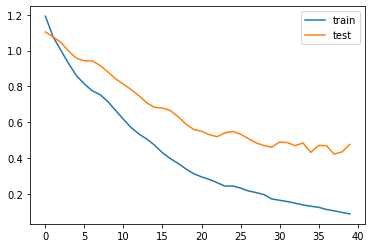

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
# fit network
history = model.fit(train, y_train_cat, epochs=40, batch_size=72, validation_data=(test, y_test_cat), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# SRU

In [ ]:
train=np.array(train_x).reshape(19,9,62)
test=np.array(test_x).reshape(19,6,62)

In [ ]:
!pip install sru

     |████████████████████████████████| 108 kB 8.0 MB/s 


In [ ]:
from sru import SRU, SRUCell
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
device = torch.device("cuda")

In [ ]:
device

device(type='cuda')

In [ ]:
from torch.autograd import Variable 
X_train_tensors = Variable(torch.tensor(list(train),dtype = torch.cfloat))
X_test_tensors  = Variable(torch.tensor(list(test),dtype = torch.cfloat))
y_train_tensors  = torch.tensor(list(y_train))
y_test_tensors  = torch.tensor(list(y_test)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


In [ ]:
X_train_tensors=X_train_tensors.to(device)
X_test_tensors=X_test_tensors.to(device)
y_train_tensors=y_train_tensors.to(device)
y_test_tensors=y_test_tensors.to(device)

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(Model, self).__init__()
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.rnn = SRU(input_size, hidden_size,
              num_layers = 2,          # number of stacking RNN layers
              dropout = 0.0,           # dropout applied between RNN layers
              rnn_dropout = 0.1,       # variational dropout applied on linear transformation
              bidirectional = False,   # bidirectional RNN ?
              layer_norm = False,      # apply layer normalization on the output of each layer
              highway_bias = 0         # initial bias of highway gate (<= 0)
              )
    self.lin=nn.Linear(128,3)
    self.rnn.cuda()
    self.lin.cuda()
        
  def forward(self,x):
    output_states, c_states = self.rnn(x.float())
    # forward pass
    output_states = output_states[-1,:, :]
    out=self.lin(output_states)
    return out

In [ ]:
class Model2(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(Model2, self).__init__()
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.rnn1 = SRUCell(input_size=input_size,hidden_size=200)
    self.rnn2= SRUCell(input_size=200,hidden_size=100)
    self.lin1=nn.Linear(100,50)
    self.lin2=nn.Linear(50,3)
    self.drop=nn.Dropout(p=0.5)
    self.rnn1.cuda()
    self.rnn2.cuda()
    self.lin1.cuda()
    self.lin2.cuda()
    
        
  def forward(self,x):
    output_states, c_states = self.rnn1(x.float())
    output_states, c_states = self.rnn2(output_states)
    # forward pass
    output_states = output_states[-1,:, :]
    output_states=self.lin1(output_states)
    output_states=self.drop(output_states)
    out=self.lin2(output_states)
    return out

In [ ]:
input_size, hidden_size,num_layers,num_classes = 62, 128,2,3
model=Model(62,hidden_size,num_layers,num_classes)
model.cuda()

Model(
  (rnn): SRU(
    (rnn_lst): ModuleList(
      (0): SRUCell(62, 128, rescale=False)
      (1): SRUCell(128, 128, rescale=False)
    )
  )
  (lin): Linear(in_features=128, out_features=3, bias=True)
)

# Models

In [ ]:
def mav_training(mav,y_train,y_test,epochs,model_number):
  input_size, hidden_size,num_layers,num_classes = 62, 128,2,3
  if(model_number==1):
    model=Model(62,hidden_size,num_layers,num_classes)
  else:
    model=Model2(62,hidden_size,num_layers,num_classes)
  model.cuda()
  # First 9 sessions
  X_train=mav.iloc[:,:9]
  # last 6 sessions
  X_test=mav.iloc[:,9:15]
  # Reshaping Input as (sample,timestep,features) = (9,19,62)
  train=[]
  a=X_train.T
  for i in range(9):
    for k in range(19):
      timestep=[]
      for j in range(62):
        timestep.append(a.iloc[i][j][k])
      train.append(timestep)
  # Reshaping Input as (sample,timestep,features) = (6,19,62)
  test=[]
  a=X_test.T
  for i in range(6):
    for k in range(19):
      timestep=[]
      for j in range(62):
        timestep.append(a.iloc[i][j][k])
      test.append(timestep)
  train=np.array(train).reshape(19,9,62)
  test=np.array(test).reshape(19,6,62)
  from torch.autograd import Variable 
  X_train_tensors = Variable(torch.tensor(list(train),dtype = torch.cfloat))
  X_test_tensors  = Variable(torch.tensor(list(test),dtype = torch.cfloat))
  y_train_tensors  = torch.tensor(list(y_train))
  y_test_tensors  = torch.tensor(list(y_test)) 
  X_train_tensors=X_train_tensors.to(device)
  X_test_tensors=X_test_tensors.to(device)
  y_train_tensors=y_train_tensors.to(device)
  y_test_tensors=y_test_tensors.to(device)
  from torch import optim
  optimizer = optim.Adam(model.parameters(), lr= 0.0001,weight_decay=1e-5)
  criterion = nn.CrossEntropyLoss()
  train_loss=[]
  test_loss=[]
  from torch.autograd import Variable
  for epoch in range(epochs):
    out=model.forward(X_train_tensors)
    optimizer.zero_grad()
    loss=criterion(out,y_train_tensors.type(torch.int64))
    train_loss.append(loss)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    val=model.forward(X_test_tensors)
    loss2=criterion(out,y_train_tensors.type(torch.int64))
    test_loss.append(loss2.item())
    print("Epoch" ,epoch+1," loss : ",loss.item())
  pred=model.forward(X_test_tensors)
  _, predicted = torch.max(pred, 1)
  return (train_loss,test_loss,predicted)
  

## MAV-Delta

Epoch 1  loss :  1.5942045450210571
Epoch 2  loss :  1.4932589530944824
Epoch 3  loss :  1.4032769203186035
Epoch 4  loss :  1.323076844215393
Epoch 5  loss :  1.2520081996917725
Epoch 6  loss :  1.1897683143615723
Epoch 7  loss :  1.1361446380615234
Epoch 8  loss :  1.090701937675476
Epoch 9  loss :  1.0525126457214355
Epoch 10  loss :  1.0200737714767456
Epoch 11  loss :  0.9914801716804504
Epoch 12  loss :  0.9647868275642395
Epoch 13  loss :  0.9383808970451355
Epoch 14  loss :  0.911210298538208
Epoch 15  loss :  0.8828281164169312
Epoch 16  loss :  0.853298544883728
Epoch 17  loss :  0.8230324387550354
Epoch 18  loss :  0.7926143407821655
Epoch 19  loss :  0.7626573443412781
Epoch 20  loss :  0.7336964011192322
Epoch 21  loss :  0.7061283588409424
Epoch 22  loss :  0.6801865100860596
Epoch 23  loss :  0.6559422016143799
Epoch 24  loss :  0.6333209276199341
Epoch 25  loss :  0.6121297478675842
Epoch 26  loss :  0.5920933485031128
Epoch 27  loss :  0.5728977918624878
Epoch 28  loss

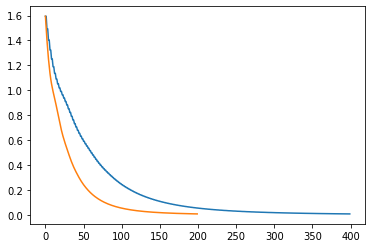

In [ ]:
result=mav_training(mav_delta,y_train,y_test,200,1)
train_loss=result[0]
test_loss=result[1]
predicted_mav_delta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
acc = torch.sum(predicted_mav_delta == y_test_tensors)/len(predicted_mav_delta)
print('Accuracy : ',acc)

## MAV-Theta

Epoch 1  loss :  1.349412441253662
Epoch 2  loss :  1.2451921701431274
Epoch 3  loss :  1.1703437566757202
Epoch 4  loss :  1.120778203010559
Epoch 5  loss :  1.0902693271636963
Epoch 6  loss :  1.0719064474105835
Epoch 7  loss :  1.0589271783828735
Epoch 8  loss :  1.0457981824874878
Epoch 9  loss :  1.0293238162994385
Epoch 10  loss :  1.0087199211120605
Epoch 11  loss :  0.9848007559776306
Epoch 12  loss :  0.9590497612953186
Epoch 13  loss :  0.9329683780670166
Epoch 14  loss :  0.90775465965271
Epoch 15  loss :  0.8842141628265381
Epoch 16  loss :  0.8627819418907166
Epoch 17  loss :  0.843537449836731
Epoch 18  loss :  0.8261980414390564
Epoch 19  loss :  0.8101536631584167
Epoch 20  loss :  0.7946068644523621
Epoch 21  loss :  0.7788061499595642
Epoch 22  loss :  0.7622724771499634
Epoch 23  loss :  0.7449142932891846
Epoch 24  loss :  0.7269943952560425
Epoch 25  loss :  0.7089815735816956
Epoch 26  loss :  0.6913705468177795
Epoch 27  loss :  0.6745307445526123
Epoch 28  loss 

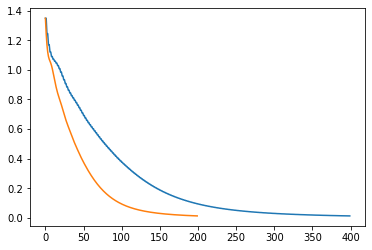

In [ ]:
result=mav_training(mav_theta,y_train,y_test,200,1)
train_loss=result[0]
test_loss=result[1]
predicted_mav_theta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
acc = torch.sum(predicted_mav_theta == y_test_tensors)/len(predicted_mav_theta)
print('Accuracy : ',acc)

## MAV Alpha

Epoch 1  loss :  1.2048850059509277
Epoch 2  loss :  1.1741291284561157
Epoch 3  loss :  1.1474918127059937
Epoch 4  loss :  1.1248705387115479
Epoch 5  loss :  1.1058589220046997
Epoch 6  loss :  1.0897547006607056
Epoch 7  loss :  1.0756685733795166
Epoch 8  loss :  1.0626932382583618
Epoch 9  loss :  1.0500645637512207
Epoch 10  loss :  1.037254810333252
Epoch 11  loss :  1.0239886045455933
Epoch 12  loss :  1.010202169418335
Epoch 13  loss :  0.9959805011749268
Epoch 14  loss :  0.98149174451828
Epoch 15  loss :  0.9669345021247864
Epoch 16  loss :  0.9524949193000793
Epoch 17  loss :  0.938319742679596
Epoch 18  loss :  0.924500584602356
Epoch 19  loss :  0.9110705852508545
Epoch 20  loss :  0.8980103731155396
Epoch 21  loss :  0.8852604031562805
Epoch 22  loss :  0.8727403283119202
Epoch 23  loss :  0.8603662848472595
Epoch 24  loss :  0.8480674028396606
Epoch 25  loss :  0.8357961773872375
Epoch 26  loss :  0.8235335946083069
Epoch 27  loss :  0.8112860321998596
Epoch 28  loss :

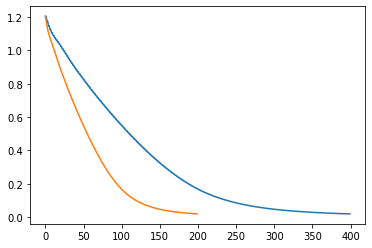

In [ ]:
result=mav_training(mav_alpha,y_train,y_test,200,1)
train_loss=result[0]
test_loss=result[1]
predicted_mav_alpha=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
acc = torch.sum(predicted_mav_alpha == y_test_tensors)/len(predicted_mav_alpha)
print('Accuracy : ',acc)

## MAV Beta

Epoch 1  loss :  1.1449187994003296
Epoch 2  loss :  1.125692367553711
Epoch 3  loss :  1.1076750755310059
Epoch 4  loss :  1.090802550315857
Epoch 5  loss :  1.0749794244766235
Epoch 6  loss :  1.0600841045379639
Epoch 7  loss :  1.045973300933838
Epoch 8  loss :  1.0324944257736206
Epoch 9  loss :  1.0194993019104004
Epoch 10  loss :  1.0068533420562744
Epoch 11  loss :  0.9944434762001038
Epoch 12  loss :  0.9821804761886597
Epoch 13  loss :  0.9700011014938354
Epoch 14  loss :  0.9578649997711182
Epoch 15  loss :  0.9457518458366394
Epoch 16  loss :  0.9336577653884888
Epoch 17  loss :  0.9215905070304871
Epoch 18  loss :  0.9095652103424072
Epoch 19  loss :  0.8976002931594849
Epoch 20  loss :  0.8857144713401794
Epoch 21  loss :  0.8739238977432251
Epoch 22  loss :  0.8622406721115112
Epoch 23  loss :  0.8506719470024109
Epoch 24  loss :  0.8392192125320435
Epoch 25  loss :  0.827879786491394
Epoch 26  loss :  0.8166466951370239
Epoch 27  loss :  0.8055101633071899
Epoch 28  loss

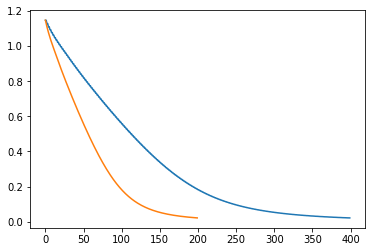

In [ ]:
result=mav_training(mav_beta,y_train,y_test,200,1)
train_loss=result[0]
test_loss=result[1]
predicted_mav_beta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
acc = torch.sum(predicted_mav_beta == y_test_tensors)/len(predicted_mav_beta)
print('Accuracy : ',acc)

## MAV Gamma

Epoch 1  loss :  1.1787352561950684
Epoch 2  loss :  1.4431740045547485
Epoch 3  loss :  1.4343204498291016
Epoch 4  loss :  0.8419111967086792
Epoch 5  loss :  1.3148304224014282
Epoch 6  loss :  1.1494975090026855
Epoch 7  loss :  1.0509819984436035
Epoch 8  loss :  0.9723276495933533
Epoch 9  loss :  0.9705135822296143
Epoch 10  loss :  1.2770018577575684
Epoch 11  loss :  1.0306872129440308
Epoch 12  loss :  0.9340839385986328
Epoch 13  loss :  0.7961544394493103
Epoch 14  loss :  0.9143670201301575
Epoch 15  loss :  0.9860268831253052
Epoch 16  loss :  0.6337435245513916
Epoch 17  loss :  0.7390559315681458
Epoch 18  loss :  1.1858115196228027
Epoch 19  loss :  0.7740277051925659
Epoch 20  loss :  1.0138171911239624
Epoch 21  loss :  0.867058515548706
Epoch 22  loss :  0.686538815498352
Epoch 23  loss :  0.7945529222488403
Epoch 24  loss :  0.9632806777954102
Epoch 25  loss :  0.6950384974479675
Epoch 26  loss :  0.7569130063056946
Epoch 27  loss :  0.8206508159637451
Epoch 28  lo

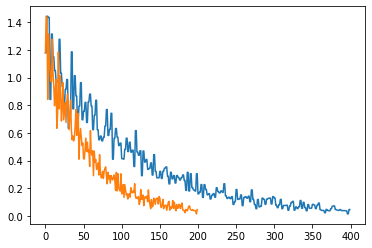

In [ ]:
result=mav_training(mav_gamma,y_train,y_test,200,2)
train_loss=result[0]
test_loss=result[1]
predicted_mav_gamma=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
acc = torch.sum(predicted_mav_gamma == y_test_tensors)/len(predicted_mav_gamma)
print('Accuracy : ',acc)

## PSD Delta

In [ ]:
result=mav_training(psd_delta,y_train,y_test,200,2)

Epoch 1  loss :  49.40946960449219
Epoch 2  loss :  88.06782531738281
Epoch 3  loss :  121.12090301513672
Epoch 4  loss :  75.69486999511719
Epoch 5  loss :  180.79473876953125
Epoch 6  loss :  121.29216766357422
Epoch 7  loss :  40.48110580444336
Epoch 8  loss :  139.48687744140625
Epoch 9  loss :  48.08279800415039
Epoch 10  loss :  119.597900390625
Epoch 11  loss :  214.8675079345703
Epoch 12  loss :  107.0306396484375
Epoch 13  loss :  42.457698822021484
Epoch 14  loss :  33.635467529296875
Epoch 15  loss :  58.17392349243164
Epoch 16  loss :  78.74209594726562
Epoch 17  loss :  116.82794952392578
Epoch 18  loss :  34.32097625732422
Epoch 19  loss :  70.76811981201172
Epoch 20  loss :  77.66506958007812
Epoch 21  loss :  73.43707275390625
Epoch 22  loss :  36.70928192138672
Epoch 23  loss :  36.96538543701172
Epoch 24  loss :  73.72451782226562
Epoch 25  loss :  83.30770874023438
Epoch 26  loss :  48.53014373779297
Epoch 27  loss :  36.97966384887695
Epoch 28  loss :  112.833282470

Accuracy :  tensor(0.5000, device='cuda:0')


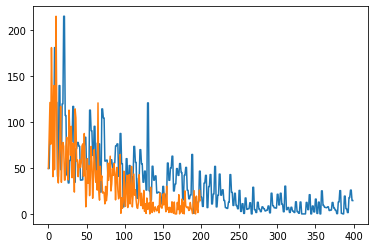

In [ ]:
train_loss=result[0]
test_loss=result[1]
predicted_psd_delta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_psd_delta == y_test_tensors)/len(predicted_psd_delta)
print('Accuracy : ',acc)

## PSD Theta 

In [ ]:
result=mav_training(psd_theta,y_train,y_test,200,2)

Epoch 1  loss :  834.5242309570312
Epoch 2  loss :  831.0149536132812
Epoch 3  loss :  548.9359741210938
Epoch 4  loss :  711.8221435546875
Epoch 5  loss :  400.1497497558594
Epoch 6  loss :  1072.224365234375
Epoch 7  loss :  559.5206298828125
Epoch 8  loss :  862.5164794921875
Epoch 9  loss :  156.4764862060547
Epoch 10  loss :  371.57330322265625
Epoch 11  loss :  670.030517578125
Epoch 12  loss :  990.092041015625
Epoch 13  loss :  439.72027587890625
Epoch 14  loss :  323.8633117675781
Epoch 15  loss :  248.97540283203125
Epoch 16  loss :  459.94244384765625
Epoch 17  loss :  326.15570068359375
Epoch 18  loss :  600.1226196289062
Epoch 19  loss :  490.2830810546875
Epoch 20  loss :  265.01324462890625
Epoch 21  loss :  525.0772094726562
Epoch 22  loss :  752.879638671875
Epoch 23  loss :  801.0660400390625
Epoch 24  loss :  833.736572265625
Epoch 25  loss :  486.2604064941406
Epoch 26  loss :  357.3714904785156
Epoch 27  loss :  292.6204528808594
Epoch 28  loss :  492.3242797851562

Accuracy :  tensor(0.5000, device='cuda:0')


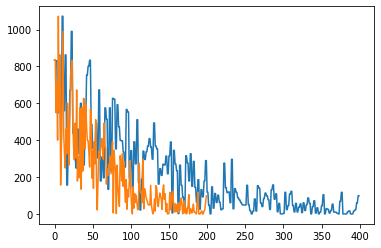

In [ ]:
train_loss=result[0]
test_loss=result[1]
predicted_psd_theta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_psd_theta == y_test_tensors)/len(predicted_psd_theta)
print('Accuracy : ',acc)

## PSD Alpha

Epoch 1  loss :  13552.482421875
Epoch 2  loss :  15505.0205078125
Epoch 3  loss :  10932.5625
Epoch 4  loss :  12361.748046875
Epoch 5  loss :  9224.353515625
Epoch 6  loss :  12943.46484375
Epoch 7  loss :  10731.5234375
Epoch 8  loss :  12524.3642578125
Epoch 9  loss :  9033.3115234375
Epoch 10  loss :  8260.9169921875
Epoch 11  loss :  11186.98828125
Epoch 12  loss :  12189.4755859375
Epoch 13  loss :  4855.435546875
Epoch 14  loss :  4862.72265625
Epoch 15  loss :  6602.150390625
Epoch 16  loss :  7912.3212890625
Epoch 17  loss :  808.770751953125
Epoch 18  loss :  11129.486328125
Epoch 19  loss :  6896.62841796875
Epoch 20  loss :  6634.8759765625
Epoch 21  loss :  8784.953125
Epoch 22  loss :  8567.88671875
Epoch 23  loss :  12221.7333984375
Epoch 24  loss :  4142.56689453125
Epoch 25  loss :  5224.39013671875
Epoch 26  loss :  7749.625
Epoch 27  loss :  4781.2578125
Epoch 28  loss :  3510.670166015625
Epoch 29  loss :  5776.59033203125
Epoch 30  loss :  8743.9443359375
Epoch 31

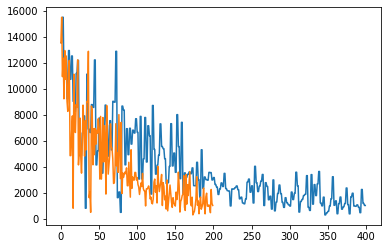

In [ ]:
result=mav_training(psd_alpha,y_train,y_test,200,2)
train_loss=result[0]
test_loss=result[1]
predicted_psd_alpha=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_psd_alpha == y_test_tensors)/len(predicted_psd_alpha)
print('Accuracy : ',acc)

## PSD Beta

Epoch 1  loss :  88679.8359375
Epoch 2  loss :  69211.0546875
Epoch 3  loss :  73339.3828125
Epoch 4  loss :  120571.265625
Epoch 5  loss :  78162.5390625
Epoch 6  loss :  76163.375
Epoch 7  loss :  100082.84375
Epoch 8  loss :  111633.8359375
Epoch 9  loss :  56619.6484375
Epoch 10  loss :  87396.328125
Epoch 11  loss :  76643.6796875
Epoch 12  loss :  53525.91015625
Epoch 13  loss :  34866.08203125
Epoch 14  loss :  21417.7578125
Epoch 15  loss :  77286.140625
Epoch 16  loss :  19370.556640625
Epoch 17  loss :  77435.8515625
Epoch 18  loss :  50489.76953125
Epoch 19  loss :  46845.859375
Epoch 20  loss :  54431.3828125
Epoch 21  loss :  73599.8515625
Epoch 22  loss :  105600.765625
Epoch 23  loss :  65789.578125
Epoch 24  loss :  43069.6171875
Epoch 25  loss :  16805.990234375
Epoch 26  loss :  125925.53125
Epoch 27  loss :  114575.0390625
Epoch 28  loss :  24989.45703125
Epoch 29  loss :  7472.85595703125
Epoch 30  loss :  83002.7890625
Epoch 31  loss :  63264.66015625
Epoch 32  los

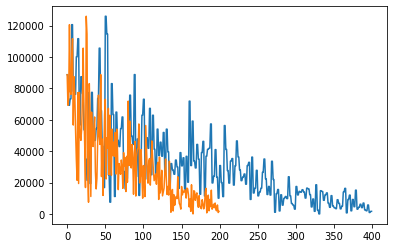

In [ ]:
result=mav_training(psd_beta,y_train,y_test,200,2)
train_loss=result[0]
test_loss=result[1]
predicted_psd_beta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_psd_beta == y_test_tensors)/len(predicted_psd_beta)
print('Accuracy : ',acc)

## PSD Gamma

Epoch 1  loss :  12617.6103515625
Epoch 2  loss :  8452.873046875
Epoch 3  loss :  15449.234375
Epoch 4  loss :  9765.09375
Epoch 5  loss :  13092.482421875
Epoch 6  loss :  10656.4892578125
Epoch 7  loss :  8810.03125
Epoch 8  loss :  8802.76171875
Epoch 9  loss :  6712.00927734375
Epoch 10  loss :  12165.076171875
Epoch 11  loss :  9537.4775390625
Epoch 12  loss :  4914.6640625
Epoch 13  loss :  10516.412109375
Epoch 14  loss :  6116.603515625
Epoch 15  loss :  8898.8330078125
Epoch 16  loss :  7756.349609375
Epoch 17  loss :  9816.3515625
Epoch 18  loss :  15725.6201171875
Epoch 19  loss :  8085.96533203125
Epoch 20  loss :  10183.662109375
Epoch 21  loss :  6959.86279296875
Epoch 22  loss :  11339.5830078125
Epoch 23  loss :  5937.755859375
Epoch 24  loss :  5022.01611328125
Epoch 25  loss :  13325.9677734375
Epoch 26  loss :  5533.484375
Epoch 27  loss :  3504.476806640625
Epoch 28  loss :  4875.73486328125
Epoch 29  loss :  3774.0654296875
Epoch 30  loss :  7407.55712890625
Epoch

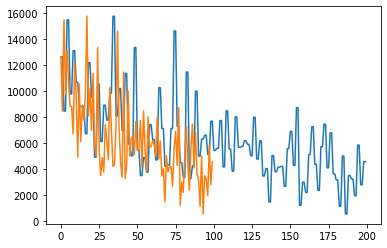

In [ ]:
result=mav_training(psd_alpha,y_train,y_test,100,2)
train_loss=result[0]
test_loss=result[1]
predicted_psd_gamma=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_psd_gamma == y_test_tensors)/len(predicted_psd_gamma)
print('Accuracy : ',acc)

## FD Delta

In [ ]:
dfa_delta

Epoch 1  loss :  1.3100249767303467
Epoch 2  loss :  1.229882836341858
Epoch 3  loss :  1.3548463582992554
Epoch 4  loss :  1.5727860927581787
Epoch 5  loss :  1.1410481929779053
Epoch 6  loss :  1.0886876583099365
Epoch 7  loss :  1.6943916082382202
Epoch 8  loss :  1.4239635467529297
Epoch 9  loss :  1.5879437923431396
Epoch 10  loss :  1.527728796005249
Epoch 11  loss :  1.2406214475631714
Epoch 12  loss :  1.5725102424621582
Epoch 13  loss :  1.2566415071487427
Epoch 14  loss :  1.2709944248199463
Epoch 15  loss :  0.8510022163391113
Epoch 16  loss :  1.334003210067749
Epoch 17  loss :  1.1194396018981934
Epoch 18  loss :  1.2799031734466553
Epoch 19  loss :  1.0378282070159912
Epoch 20  loss :  1.0548629760742188
Epoch 21  loss :  1.3963618278503418
Epoch 22  loss :  1.2155241966247559
Epoch 23  loss :  1.1440544128417969
Epoch 24  loss :  1.0677074193954468
Epoch 25  loss :  1.1526545286178589
Epoch 26  loss :  1.0580229759216309
Epoch 27  loss :  1.2573320865631104
Epoch 28  los

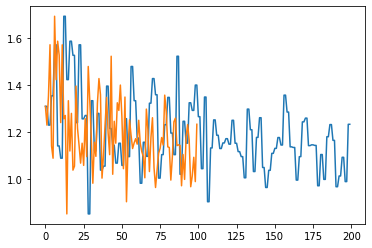

In [ ]:
result=mav_training(dfa_delta,y_train,y_test,100,2)
train_loss=result[0]
test_loss=result[1]
predicted_dfa_delta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_dfa_delta == y_test_tensors)/len(predicted_dfa_delta)
print('Accuracy : ',acc)

##FD Theta

Epoch 1  loss :  1.5634137392044067
Epoch 2  loss :  1.4449005126953125
Epoch 3  loss :  1.4257930517196655
Epoch 4  loss :  1.514122724533081
Epoch 5  loss :  1.9250469207763672
Epoch 6  loss :  1.0266093015670776
Epoch 7  loss :  1.1137266159057617
Epoch 8  loss :  1.4602898359298706
Epoch 9  loss :  1.2421351671218872
Epoch 10  loss :  1.5215412378311157
Epoch 11  loss :  1.1814844608306885
Epoch 12  loss :  1.0672065019607544
Epoch 13  loss :  0.9888342618942261
Epoch 14  loss :  1.2861104011535645
Epoch 15  loss :  1.3608585596084595
Epoch 16  loss :  1.3304522037506104
Epoch 17  loss :  1.5201666355133057
Epoch 18  loss :  1.289925217628479
Epoch 19  loss :  1.0173383951187134
Epoch 20  loss :  1.1303311586380005
Epoch 21  loss :  1.4695723056793213
Epoch 22  loss :  1.0905046463012695
Epoch 23  loss :  1.1704130172729492
Epoch 24  loss :  0.9311537146568298
Epoch 25  loss :  1.4290430545806885
Epoch 26  loss :  1.197160243988037
Epoch 27  loss :  1.1935884952545166
Epoch 28  los

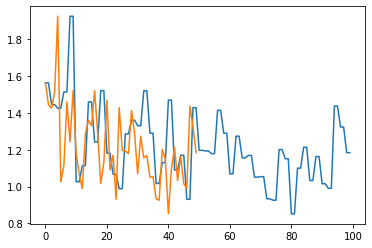

In [ ]:
result=mav_training(dfa_theta,y_train,y_test,50,2)
train_loss=result[0]
test_loss=result[1]
predicted_dfa_theta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_dfa_theta == y_test_tensors)/len(predicted_dfa_theta)
print('Accuracy : ',acc)

## FD Alpha

Epoch 1  loss :  1.3401339054107666
Epoch 2  loss :  1.71756112575531
Epoch 3  loss :  1.310736060142517
Epoch 4  loss :  1.1829893589019775
Epoch 5  loss :  1.2011253833770752
Epoch 6  loss :  1.1142804622650146
Epoch 7  loss :  1.4527056217193604
Epoch 8  loss :  1.468773603439331
Epoch 9  loss :  1.2592226266860962
Epoch 10  loss :  1.074800968170166
Epoch 11  loss :  1.411689043045044
Epoch 12  loss :  1.3992336988449097
Epoch 13  loss :  1.4816797971725464
Epoch 14  loss :  1.2391352653503418
Epoch 15  loss :  1.394635558128357
Epoch 16  loss :  1.4513869285583496
Epoch 17  loss :  1.348490595817566
Epoch 18  loss :  0.962060272693634
Epoch 19  loss :  1.1182485818862915
Epoch 20  loss :  1.0142964124679565
Epoch 21  loss :  1.3497073650360107
Epoch 22  loss :  1.2580130100250244
Epoch 23  loss :  1.4127733707427979
Epoch 24  loss :  1.3487385511398315
Epoch 25  loss :  1.0920792818069458
Epoch 26  loss :  1.1844091415405273
Epoch 27  loss :  1.25905442237854
Epoch 28  loss :  1.4

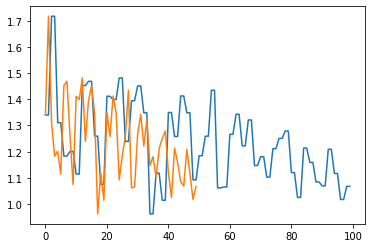

In [ ]:
result=mav_training(dfa_alpha,y_train,y_test,50,2)
train_loss=result[0]
test_loss=result[1]
predicted_dfa_alpha=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_dfa_alpha == y_test_tensors)/len(predicted_dfa_alpha)
print('Accuracy : ',acc)

## FD Beta

Epoch 1  loss :  1.6572723388671875
Epoch 2  loss :  1.1888697147369385
Epoch 3  loss :  1.2654166221618652
Epoch 4  loss :  1.8298693895339966
Epoch 5  loss :  1.2113206386566162
Epoch 6  loss :  1.529759168624878
Epoch 7  loss :  1.1200246810913086
Epoch 8  loss :  1.4874085187911987
Epoch 9  loss :  1.3681235313415527
Epoch 10  loss :  0.9802920818328857
Epoch 11  loss :  1.2376914024353027
Epoch 12  loss :  1.248537540435791
Epoch 13  loss :  1.6318851709365845
Epoch 14  loss :  1.2267482280731201
Epoch 15  loss :  1.5280356407165527
Epoch 16  loss :  1.0390973091125488
Epoch 17  loss :  1.2589049339294434
Epoch 18  loss :  1.236307978630066
Epoch 19  loss :  1.255096435546875
Epoch 20  loss :  1.6410090923309326
Epoch 21  loss :  1.084498643875122
Epoch 22  loss :  1.097920536994934
Epoch 23  loss :  1.1893963813781738
Epoch 24  loss :  1.418070673942566
Epoch 25  loss :  0.9452877044677734
Epoch 26  loss :  1.301668643951416
Epoch 27  loss :  0.9388166069984436
Epoch 28  loss :  

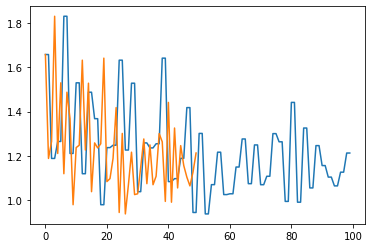

In [ ]:
result=mav_training(dfa_beta,y_train,y_test,50,2)
train_loss=result[0]
test_loss=result[1]
predicted_dfa_beta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_dfa_beta == y_test_tensors)/len(predicted_dfa_beta)
print('Accuracy : ',acc)

## FD Gamma

Epoch 1  loss :  1.6927286386489868
Epoch 2  loss :  1.474016785621643
Epoch 3  loss :  1.5711103677749634
Epoch 4  loss :  1.5113271474838257
Epoch 5  loss :  1.3204922676086426
Epoch 6  loss :  1.0855637788772583
Epoch 7  loss :  1.6927207708358765
Epoch 8  loss :  1.2475223541259766
Epoch 9  loss :  1.2829649448394775
Epoch 10  loss :  1.2292813062667847
Epoch 11  loss :  1.4692353010177612
Epoch 12  loss :  1.244797706604004
Epoch 13  loss :  1.1241207122802734
Epoch 14  loss :  0.797123372554779
Epoch 15  loss :  1.2446085214614868
Epoch 16  loss :  1.3210246562957764
Epoch 17  loss :  1.0520696640014648
Epoch 18  loss :  1.1197562217712402
Epoch 19  loss :  1.3643609285354614
Epoch 20  loss :  1.2631502151489258
Epoch 21  loss :  1.0470709800720215
Epoch 22  loss :  1.5370827913284302
Epoch 23  loss :  1.38792884349823
Epoch 24  loss :  1.2806627750396729
Epoch 25  loss :  1.0238231420516968
Epoch 26  loss :  1.2416329383850098
Epoch 27  loss :  1.1281286478042603
Epoch 28  loss 

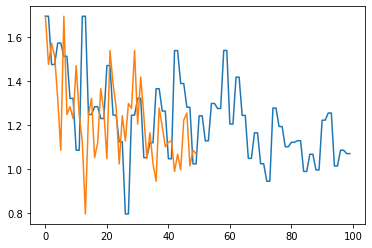

In [ ]:
result=mav_training(dfa_gamma,y_train,y_test,50,2)
train_loss=result[0]
test_loss=result[1]
predicted_dfa_gamma=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_dfa_gamma == y_test_tensors)/len(predicted_dfa_gamma)
print('Accuracy : ',acc)

## DE Delta

Epoch 1  loss :  4.658442497253418
Epoch 2  loss :  3.2254960536956787
Epoch 3  loss :  2.059191942214966
Epoch 4  loss :  6.34062385559082
Epoch 5  loss :  2.6996357440948486
Epoch 6  loss :  3.1906535625457764
Epoch 7  loss :  1.8411767482757568
Epoch 8  loss :  3.6654505729675293
Epoch 9  loss :  1.572741985321045
Epoch 10  loss :  6.077108860015869
Epoch 11  loss :  2.4243526458740234
Epoch 12  loss :  3.008680820465088
Epoch 13  loss :  3.0639448165893555
Epoch 14  loss :  2.4158880710601807
Epoch 15  loss :  2.106199264526367
Epoch 16  loss :  2.9743824005126953
Epoch 17  loss :  1.8293647766113281
Epoch 18  loss :  2.330303430557251
Epoch 19  loss :  2.540961742401123
Epoch 20  loss :  1.3762832880020142
Epoch 21  loss :  3.5120112895965576
Epoch 22  loss :  2.4410386085510254
Epoch 23  loss :  2.6129331588745117
Epoch 24  loss :  1.214219570159912
Epoch 25  loss :  2.706793785095215
Epoch 26  loss :  2.4700350761413574
Epoch 27  loss :  2.4160470962524414
Epoch 28  loss :  2.87

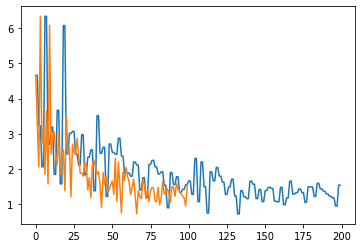

In [ ]:
result=mav_training(entropy_delta,y_train,y_test,100,2)
train_loss=result[0]
test_loss=result[1]
predicted_entropy_delta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_entropy_delta == y_test_tensors)/len(predicted_entropy_delta)
print('Accuracy : ',acc)

## DE Theta

Epoch 1  loss :  4.0013747215271
Epoch 2  loss :  4.280099868774414
Epoch 3  loss :  3.27504825592041
Epoch 4  loss :  1.7055469751358032
Epoch 5  loss :  2.8255863189697266
Epoch 6  loss :  1.4942493438720703
Epoch 7  loss :  1.5555028915405273
Epoch 8  loss :  1.5494294166564941
Epoch 9  loss :  2.030787467956543
Epoch 10  loss :  1.9148300886154175
Epoch 11  loss :  1.7508182525634766
Epoch 12  loss :  2.211005687713623
Epoch 13  loss :  1.8191806077957153
Epoch 14  loss :  1.238593339920044
Epoch 15  loss :  1.5388916730880737
Epoch 16  loss :  1.650763750076294
Epoch 17  loss :  0.8909684419631958
Epoch 18  loss :  1.2992370128631592
Epoch 19  loss :  1.9419138431549072
Epoch 20  loss :  0.8991081714630127
Epoch 21  loss :  0.939490556716919
Epoch 22  loss :  1.2909871339797974
Epoch 23  loss :  1.8952507972717285
Epoch 24  loss :  0.7685101628303528
Epoch 25  loss :  1.531900405883789
Epoch 26  loss :  1.6874297857284546
Epoch 27  loss :  1.405146598815918
Epoch 28  loss :  1.776

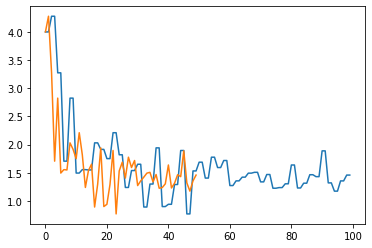

In [ ]:
result=mav_training(entropy_theta,y_train,y_test,50,2)
train_loss=result[0]
test_loss=result[1]
predicted_entropy_theta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_entropy_theta == y_test_tensors)/len(predicted_entropy_theta)
print('Accuracy : ',acc)

## DE Alpha

Epoch 1  loss :  2.526367425918579
Epoch 2  loss :  4.093294143676758
Epoch 3  loss :  2.420900583267212
Epoch 4  loss :  2.224961280822754
Epoch 5  loss :  3.9611592292785645
Epoch 6  loss :  2.543116569519043
Epoch 7  loss :  4.5794525146484375
Epoch 8  loss :  3.2515132427215576
Epoch 9  loss :  3.038783073425293
Epoch 10  loss :  2.0615272521972656
Epoch 11  loss :  3.260375738143921
Epoch 12  loss :  2.6749534606933594
Epoch 13  loss :  1.473726749420166
Epoch 14  loss :  1.5326080322265625
Epoch 15  loss :  2.210803985595703
Epoch 16  loss :  2.6495327949523926
Epoch 17  loss :  1.7179967164993286
Epoch 18  loss :  3.587855100631714
Epoch 19  loss :  2.3750674724578857
Epoch 20  loss :  1.5579125881195068
Epoch 21  loss :  1.4908171892166138
Epoch 22  loss :  1.997020959854126
Epoch 23  loss :  0.8572542071342468
Epoch 24  loss :  2.08284330368042
Epoch 25  loss :  2.061884641647339
Epoch 26  loss :  2.1853342056274414
Epoch 27  loss :  2.0627241134643555
Epoch 28  loss :  2.3064

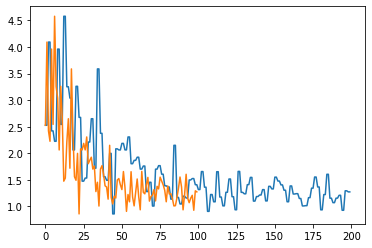

In [ ]:
result=mav_training(entropy_alpha,y_train,y_test,100,2)
train_loss=result[0]
test_loss=result[1]
predicted_entropy_alpha=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_entropy_alpha == y_test_tensors)/len(predicted_entropy_alpha)
print('Accuracy : ',acc)

## DE Beta

Epoch 1  loss :  2.1315133571624756
Epoch 2  loss :  2.886624336242676
Epoch 3  loss :  1.5586743354797363
Epoch 4  loss :  1.8476121425628662
Epoch 5  loss :  2.102888345718384
Epoch 6  loss :  1.31489098072052
Epoch 7  loss :  2.4951727390289307
Epoch 8  loss :  2.372039794921875
Epoch 9  loss :  1.611767292022705
Epoch 10  loss :  1.9656355381011963
Epoch 11  loss :  1.4563164710998535
Epoch 12  loss :  1.948141098022461
Epoch 13  loss :  2.0400731563568115
Epoch 14  loss :  1.7500556707382202
Epoch 15  loss :  1.0297021865844727
Epoch 16  loss :  1.4245178699493408
Epoch 17  loss :  1.1399110555648804
Epoch 18  loss :  0.8006983995437622
Epoch 19  loss :  1.8696637153625488
Epoch 20  loss :  1.4535640478134155
Epoch 21  loss :  2.0743651390075684
Epoch 22  loss :  1.8432456254959106
Epoch 23  loss :  1.8777024745941162
Epoch 24  loss :  0.8129931092262268
Epoch 25  loss :  1.2803020477294922
Epoch 26  loss :  1.0645678043365479
Epoch 27  loss :  1.5102667808532715
Epoch 28  loss : 

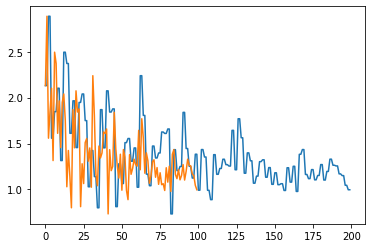

In [ ]:
result=mav_training(entropy_beta,y_train,y_test,100,2)
train_loss=result[0]
test_loss=result[1]
predicted_entropy_beta=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_entropy_beta == y_test_tensors)/len(predicted_entropy_beta)
print('Accuracy : ',acc)

## DE Gamma

Epoch 1  loss :  3.2329745292663574
Epoch 2  loss :  2.4904603958129883
Epoch 3  loss :  2.447808027267456
Epoch 4  loss :  3.000413179397583
Epoch 5  loss :  1.7383854389190674
Epoch 6  loss :  2.3765878677368164
Epoch 7  loss :  1.881980299949646
Epoch 8  loss :  1.3329402208328247
Epoch 9  loss :  1.2012145519256592
Epoch 10  loss :  2.113142967224121
Epoch 11  loss :  2.6767165660858154
Epoch 12  loss :  1.8163365125656128
Epoch 13  loss :  0.9466792345046997
Epoch 14  loss :  0.8200138807296753
Epoch 15  loss :  2.31952166557312
Epoch 16  loss :  1.885142207145691
Epoch 17  loss :  1.5705705881118774
Epoch 18  loss :  1.4795546531677246
Epoch 19  loss :  1.4499391317367554
Epoch 20  loss :  1.6679209470748901
Epoch 21  loss :  1.9790682792663574
Epoch 22  loss :  1.8894528150558472
Epoch 23  loss :  0.9725344777107239
Epoch 24  loss :  1.8047765493392944
Epoch 25  loss :  1.5809452533721924
Epoch 26  loss :  1.1331249475479126
Epoch 27  loss :  1.8832223415374756
Epoch 28  loss : 

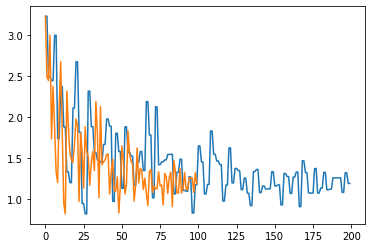

In [ ]:
result=mav_training(entropy_gamma,y_train,y_test,100,2)
train_loss=result[0]
test_loss=result[1]
predicted_entropy_gamma=result[2]
plt.plot(train_loss)
plt.plot(test_loss)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(predicted_entropy_gamma == y_test_tensors)/len(predicted_entropy_gamma)
print('Accuracy : ',acc)

# Ensemble

Select
the best feature for each of the five frequency bands for ensemble

With Voting ensemble

In [ ]:
prediction=[]
for i in range(6):
  pos=0
  neg=0
  neu=0
  pred=[predicted_mav_delta,predicted_dfa_theta,predicted_mav_alpha,predicted_entropy_beta,predicted_entropy_gamma]
  for p in pred:
    if(p[i]==0):
      neg+=1
    elif(p[i]==1):
      neu+=1
    else:
      pos+=1
  max_emotion=max(pos,max(neg,neu))
  print(neg," ",neu," ",pos)
  if(neg==max_emotion):
    prediction.append(0)
  elif(pos==max_emotion):
    prediction.append(2)
  else:
    prediction.append(1)

2   0   3
1   4   0
4   1   0
2   2   1
1   2   2
5   0   0


In [ ]:
y_test

array([2, 1, 0, 1, 2, 0])

In [ ]:
prediction

[2, 1, 0, 0, 2, 0]

In [ ]:
prediction = torch.tensor(list(prediction))
prediction=prediction.to(device)
y_test_tensors  = torch.tensor(list(y_test))
y_test_tensors=y_test_tensors.to(device)
acc = torch.sum(prediction == y_test_tensors)/len(prediction)
print('Accuracy : ',acc)

Accuracy :  tensor(0.8333, device='cuda:0')
